In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt 
%matplotlib inline

## Конвертация файла Excel

In [2]:
df = pd.read_excel(r'C:\Users\iov\Desktop\Course Data Science\Final project\practice.xlsx')

In [3]:
df.head(10)

,Product,Client,Order,Qty,Sales,Period
0,Product 1,Клієнт 1,78542,1,3.337209,01.07.2019 09:25:47
1,Product 2,Клієнт 2,78554,1,6.093023,02.07.2019 09:42:14
2,Product 3,Клієнт 2,78554,1,3.193023,02.07.2019 09:42:14
3,Product 4,Клієнт 2,78554,1,6.297674,02.07.2019 09:42:14
4,Product 5,Клієнт 3,78578,1,9.558140,01.07.2019 14:40:51
5,Product 6,Клієнт 3,78578,1,2.788372,01.07.2019 14:40:51
6,Product 7,Клієнт 4,78593,1,28.944186,01.07.2019 10:49:20
7,Product 8,Клієнт 4,78593,1,30.958140,01.07.2019 10:49:20
8,Product 9,Клієнт 5,78597,1,0.962791,01.07.2019 10:41:27
9,Product 10,Клієнт 5,78597,1,1.832558,01.07.2019 10:41:27


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27994 entries, 0 to 27993
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Product  27994 non-null  object 
 1   Client   27994 non-null  object 
 2   Order    27994 non-null  object 
 3   Qty      27994 non-null  int64  
 4   Sales    27994 non-null  float64
 5   Period   27994 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.3+ MB


## Обработка данных

In [5]:
# Конвертация даты в тип “datetime”
df['Period'] = pd.to_datetime(df['Period'])

# Очищаю DataFrame от записей, у которых количество продаж меньше или равно нулю 
df_date = df[df['Qty'] > 0]

# Из поля с типом “datetime” выделяю в отдельные поля дату, год и месяц
df_date['date'] = df_date['Period'].dt.date
df_date['year'] = df_date['Period'].dt.year
df_date['month'] = df_date['Period'].dt.month

# Расчет поля “Price”
df_date['price'] = df_date['Sales'] / df_date['Qty']

# Выделение поля с типом “Period”
df_date['period_of_year'] = df_date['Period'].dt.to_period("M")

<ipython-input-5-c19dfa3215a3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['date'] = df_date['Period'].dt.date
<ipython-input-5-c19dfa3215a3>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['year'] = df_date['Period'].dt.year
<ipython-input-5-c19dfa3215a3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

## Поиск неадекватных цен

In [6]:
df_price = pd.pivot_table(df_date, values='price', index=['Product', 'date'],
                          aggfunc={'price': [min, max, np.mean]})
df_price[(df_price['max'] - df_price['mean'] > 10) ]

,,max,mean,min
Product,date,,,
Product 101,2019-08-10,22.201163,11.148837,0.096512
Product 1974,2019-10-09,338.669767,174.272093,9.874419
Product 76,2019-03-09,30.988372,15.495349,0.002326


In [8]:
df_date[(df_date['price'] <= 1) & (df_date['Client'] == 'Клієнт 36')]

,Product,Client,Order,Qty,Sales,Period,date,year,month,price,period_of_year
8825,Product 101,Клієнт 36,95057,2,0.004651,2019-08-27 09:02:00,2019-08-27,2019,8,0.002326,2019-08
9945,Product 76,Клієнт 36,99367,1,0.002326,2019-10-09 09:02:00,2019-10-09,2019,10,0.002326,2019-10
9970,Product 101,Клієнт 36,99485,2,0.004651,2019-09-26 09:02:00,2019-09-26,2019,9,0.002326,2019-09
10029,Product 17,Клієнт 36,99864,2,0.004651,2019-09-30 09:02:00,2019-09-30,2019,9,0.002326,2019-09
10244,Product 76,Клієнт 36,АГ000100831,1,0.002326,2019-03-09 09:02:00,2019-03-09,2019,3,0.002326,2019-03
10702,Product 18,Клієнт 36,АГ000102459,1,0.000000,2019-10-09 09:02:00,2019-10-09,2019,10,0.000000,2019-10
10703,Product 27,Клієнт 36,АГ000102459,1,0.002326,2019-10-09 09:02:00,2019-10-09,2019,10,0.002326,2019-10
11576,Product 101,Клієнт 36,АГ000105305,2,0.193023,2019-08-10 09:02:00,2019-08-10,2019,8,0.096512,2019-08
13971,Product 1605,Клієнт 36,16353,1,0.193023,2020-02-27 09:02:00,2020-02-27,2020,2,0.193023,2020-02


In [9]:
df_date[(df_date['Product'] == 'Product 101') & (df_date['year'] == 2019) & (df_date['month'] == 8)]

,Product,Client,Order,Qty,Sales,Period,date,year,month,price,period_of_year
3015,Product 101,Клієнт 61,80131,2,41.841860,2019-08-07 12:22:19,2019-08-07,2019,8,20.920930,2019-08
4107,Product 101,Клієнт 9,64315,2,34.772093,2019-08-04 15:16:23,2019-08-04,2019,8,17.386047,2019-08
4404,Product 101,Клієнт 218,53017,4,75.260465,2019-08-02 10:30:33,2019-08-02,2019,8,18.815116,2019-08
4416,Product 101,Клієнт 186,53097,2,37.679070,2019-08-02 15:22:00,2019-08-02,2019,8,18.839535,2019-08
5563,Product 101,Клієнт 123,69599,4,77.274419,2019-08-05 09:56:30,2019-08-05,2019,8,19.318605,2019-08
7504,Product 101,Клієнт 79,89289,2,38.060465,2019-08-08 12:08:27,2019-08-08,2019,8,19.030233,2019-08
7510,Product 101,Клієнт 246,89306,2,42.288372,2019-08-08 12:56:22,2019-08-08,2019,8,21.144186,2019-08
7681,Product 101,Клієнт 323,89910,4,80.381395,2019-08-15 13:39:01,2019-08-15,2019,8,20.095349,2019-08
7787,Product 101,Клієнт 566,90323,2,42.181395,2019-08-27 14:58:12,2019-08-27,2019,8,21.090698,2019-08
7958,Product 101,Клієнт 208,90942,2,40.174419,2019-08-16 12:01:24,2019-08-16,2019,8,20.087209,2019-08


In [10]:
#  Из DataFrame удаляются строки с явно неадекватными ценами 
df_date = df_date.drop([10704, 8825, 11576, 10029, 10703, 10244, 9970, 10702, 13971])

#### Примечание:
Неадекватные цены наблюдаются у клиента "Клієнт 36".

Все операции клиента "Клієнт 36" требуют проведение внутреннего аудита, цель которого установить причины применения неадекватных цен.


## Динамика среднего чека

In [11]:
'''  Отбор уникальных заказов. 
     Если одинаковый номер заказа встречается в разные дни, считается, что заказ уникальный для каждого такого дня ''' 

df_index = df_date[['Order', 'Client', 'year', 'month', 'date' ]].value_counts()

df_index = df_index.index.to_frame(index=False, name=df_index.index.names)


In [12]:
df_sum = pd.pivot_table(df_date, values='Sales', index=['month'], columns=['year'], aggfunc=np.sum)
df_count = pd.pivot_table(df_index, values='Order', index=['month'], columns=['year'], aggfunc='count')

In [13]:
# Расчет среднего чека

df_stat = pd.concat([df_sum, df_count], axis=1)
df_stat.columns = ['Sales 2018','Sales 2019','Sales 2020','Sales 2021',
                   'Order 2018','Order 2019', 'Order 2020','Order 2021']
df_stat['avg_bill 2018'] = round(df_stat['Sales 2018'] / df_stat['Order 2018'], 2)
df_stat['avg_bill 2019'] = round(df_stat['Sales 2019'] / df_stat['Order 2019'], 2)
df_stat['avg_bill 2020'] = round(df_stat['Sales 2020'] / df_stat['Order 2020'], 2)
df_stat['avg_bill 2021'] = round(df_stat['Sales 2021'] / df_stat['Order 2021'], 2)

## Визуализация динамики продаж и среднего чека 2019 -2021гг.

Text(0.5, 1.0, 'Average bill 2021')

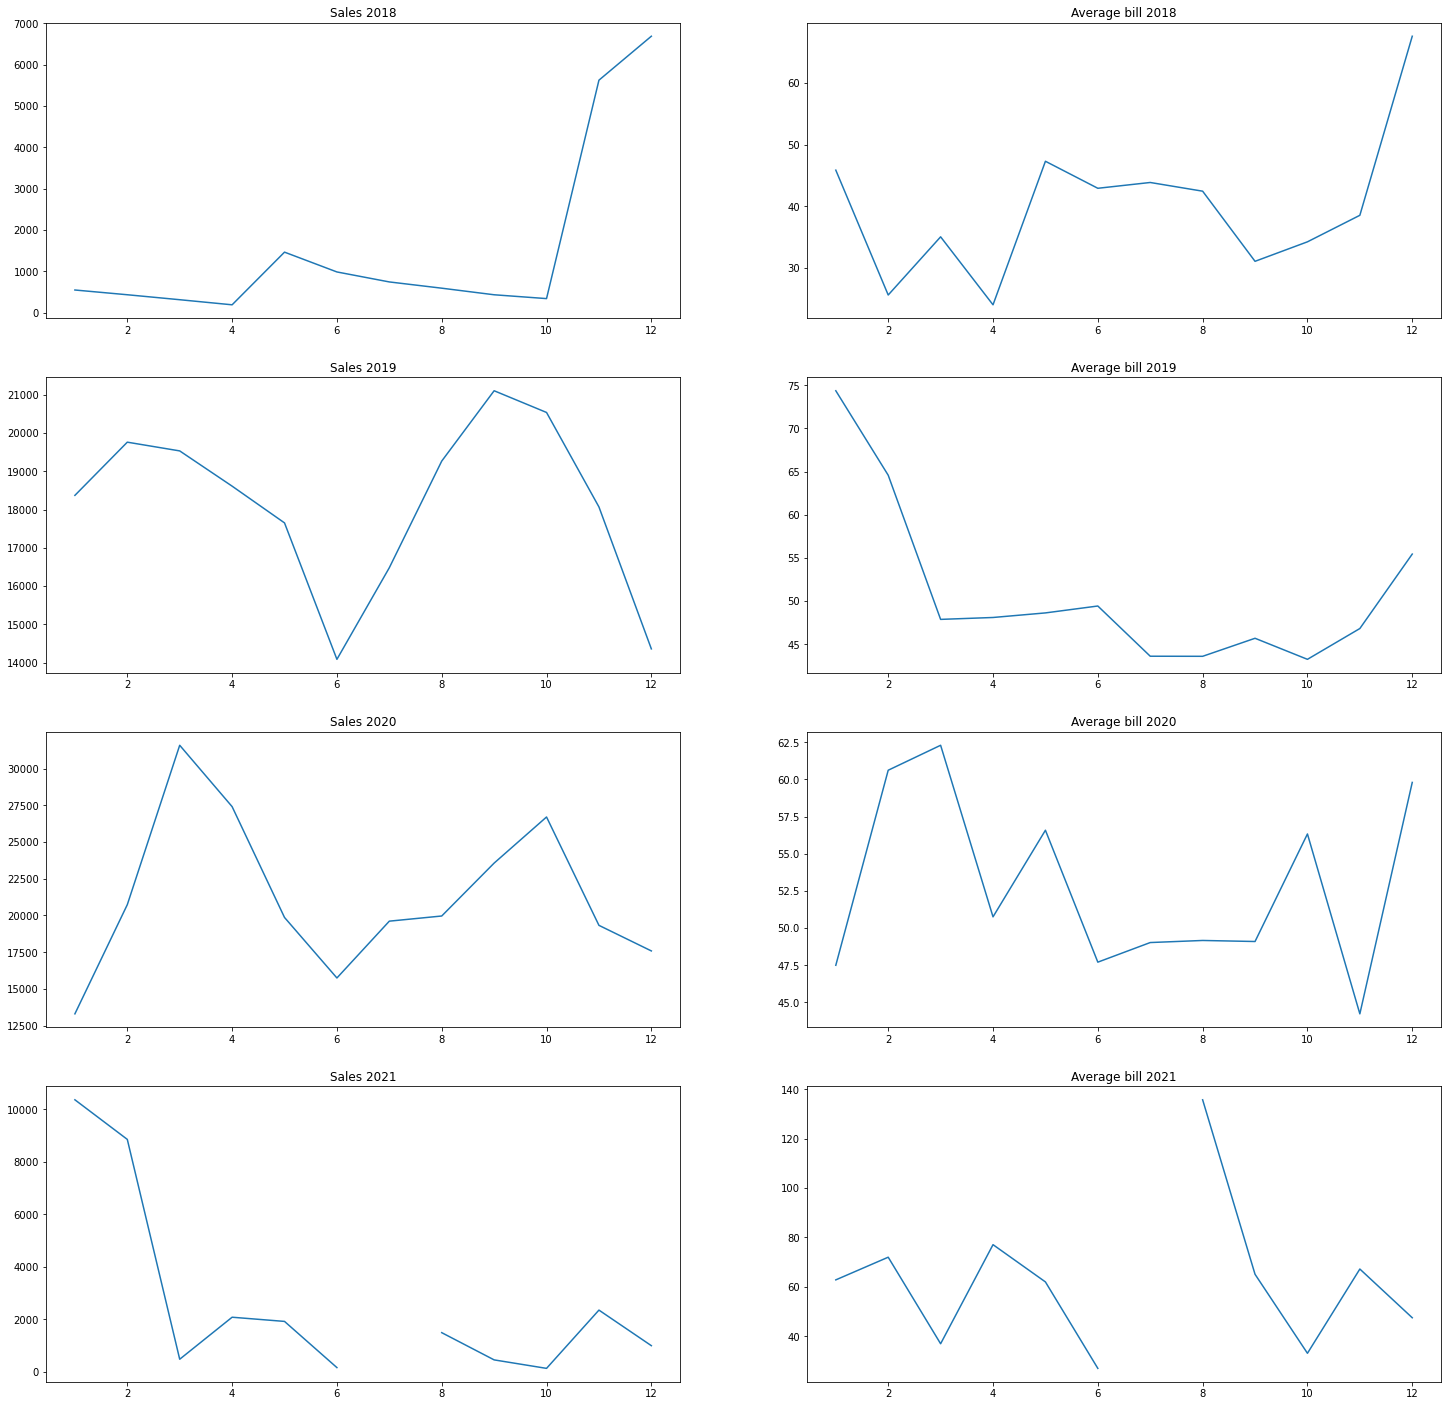

In [14]:
x = df_stat.index

y_2018_Sales = df_stat['Sales 2018'].values
y_2019_Sales = df_stat['Sales 2019'].values
y_2020_Sales = df_stat['Sales 2020'].values
y_2021_Sales = df_stat['Sales 2021'].values

y_2018_avg_bill = df_stat['avg_bill 2018'].values
y_2019_avg_bill = df_stat['avg_bill 2019'].values
y_2020_avg_bill = df_stat['avg_bill 2020'].values
y_2021_avg_bill = df_stat['avg_bill 2021'].values

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, figsize = (25,25))
ax1.plot(x, y_2018_Sales)
ax2.plot(x, y_2018_avg_bill)
ax3.plot(x, y_2019_Sales)
ax4.plot(x, y_2019_avg_bill)
ax5.plot(x, y_2020_Sales)
ax6.plot(x, y_2020_avg_bill)
ax7.plot(x, y_2021_Sales)
ax8.plot(x, y_2021_avg_bill)


ax1.set_title('Sales 2018')
ax2.set_title('Average bill 2018')
ax3.set_title('Sales 2019')
ax4.set_title('Average bill 2019')
ax5.set_title('Sales 2020')
ax6.set_title('Average bill 2020')
ax7.set_title('Sales 2021')
ax8.set_title('Average bill 2021')


Вывод:
1) сезонность
2) дальнейший анализ 2019 и 2020

## ABC анализ по продукту 2019-2020гг

In [15]:
df_19 = df_date[df_date['year'] == 2019]
df_20 = df_date[df_date['year'] == 2020]

df_ABC_19 = pd.pivot_table(df_19, values='Sales', index=['Product'], columns=['year'], aggfunc=np.sum)
df_ABC_20 = pd.pivot_table(df_20, values='Sales', index=['Product'], columns=['year'], aggfunc=np.sum)

df_ABC_19.sort_values(by=2019, ascending=False, inplace= True)
df_ABC_20.sort_values(by=2020, ascending=False, inplace= True)

In [16]:
df_ABC_19['share'] = round((df_ABC_19[2019]/df_ABC_19[2019].sum())*100,2)
df_ABC_19['share_cumsum']= df_ABC_19['share'].cumsum()

df_ABC_20['share'] = round((df_ABC_20[2020]/df_ABC_20[2020].sum())*100,2)
df_ABC_20['share_cumsum']= df_ABC_20['share'].cumsum()


In [17]:
def ABC_Product(share_cumsum):
    
    if share_cumsum <= 80:
        status = 'A'
    elif (share_cumsum > 80) and (share_cumsum <= 90):
        status = 'B'
    else:
        status = 'C'
    return status

df_ABC_19['status'] = df_ABC_19['share_cumsum'].map(ABC_Product)
df_ABC_20['status'] = df_ABC_20['share_cumsum'].map(ABC_Product)
    

In [18]:
df_ABC_19.reset_index(inplace=True)
df_ABC_20.reset_index(inplace=True)

In [19]:
df_ABC_19.rename(columns = {2019:'sales_2019',
                            'Product':'Product_2019',
                            'share_cumsum':'share_cumsum_2019',
                            'status':'status_2019'}, inplace=True)
df_ABC_20.rename(columns = {2020:'sales_2020',
                            'Product':'Product_2020',
                            'share_cumsum':'share_cumsum_2020',
                            'status':'status_2020'}, inplace=True)

In [20]:
df_ABC_19_svod = pd.pivot_table(df_ABC_19, values=['Product_2019', 'sales_2019', 'share_cumsum_2019'],
                                            index=['status_2019'], 
                                           aggfunc={ 'Product_2019': 'count',
                                                     'sales_2019' : np.sum,
                                                     'share_cumsum_2019': np.max},
                                            margins=True) 

df_ABC_20_svod = pd.pivot_table(df_ABC_20, values=['Product_2020', 'sales_2020', 'share_cumsum_2020'],
                                            index=['status_2020'], 
                                           aggfunc={ 'Product_2020': 'count',
                                                     'sales_2020' : np.sum,
                                                     'share_cumsum_2020': np.max},
                                           margins=True) 

In [21]:
df_ABC_19_svod

,Product_2019,sales_2019,share_cumsum_2019
status_2019,,,
A,48,173892.774419,79.83
B,27,21824.606977,89.81
C,205,22104.295349,99.96
All,280,217821.676744,99.96


In [22]:
df_ABC_20_svod

,Product_2020,sales_2020,share_cumsum_2020
status_2020,,,
A,47,203438.167442,79.67
B,31,25895.504651,89.82
C,229,26023.111628,100.01
All,307,255356.783721,100.01


In [23]:
df_ABC_19_20 = df_ABC_19
df_ABC_19_20 = pd.merge(df_ABC_19_20, df_ABC_20, how ='outer', left_on='Product_2019', right_on='Product_2020')

In [ ]:
# df_list_of_prod_A = pd.concat([df_ABC_19_20['Product_2019'][(df_ABC_19_20['status_2019'] == 'A')],
#                              df_ABC_19_20['Product_2020'][(df_ABC_19_20['status_2020'] == 'A')]])
# df_list_of_prod_A.drop_duplicates(inplace=True)
# df_list_of_prod_A

In [24]:
ABC = df_ABC_19_20[(df_ABC_19_20['status_2019'] == 'A') | (df_ABC_19_20['status_2020'] == 'A')]

In [25]:
ABC

year,Product_2019,sales_2019,share_x,share_cumsum_2019,status_2019,Product_2020,sales_2020,share_y,share_cumsum_2020,status_2020
0,Product 58,21322.420930,9.79,9.79,A,Product 58,20897.113953,8.18,17.29,A
1,Product 23,17290.858140,7.94,17.73,A,Product 23,23272.644186,9.11,9.11,A
2,Product 25,14549.446512,6.68,24.41,A,Product 25,17082.448837,6.69,23.98,A
3,Product 101,9431.374419,4.33,28.74,A,Product 101,10483.300000,4.11,28.09,A
4,Product 76,7313.800000,3.36,32.10,A,Product 76,8474.913953,3.32,31.41,A
5,Product 18,5783.834884,2.66,34.76,A,Product 18,4323.460465,1.69,45.56,A
6,Product 27,5392.332558,2.48,37.24,A,Product 27,6250.074419,2.45,36.37,A
7,Product 17,5282.288372,2.43,39.67,A,Product 17,4935.132558,1.93,38.30,A
8,Product 82,4251.488372,1.95,41.62,A,Product 82,4880.939535,1.91,40.21,A
9,Product 282,4064.148837,1.87,43.49,A,Product 282,6418.779070,2.51,33.92,A


#### ABC анализ по клиентам 2019-2020гг

In [26]:
df_19_client = df_date[df_date['year'] == 2019]
df_20_client = df_date[df_date['year'] == 2020]

df_ABC_19_client = pd.pivot_table(df_19_client, values='Sales', index=['Client'], columns=['year'], aggfunc=np.sum)
df_ABC_20_client = pd.pivot_table(df_20_client, values='Sales', index=['Client'], columns=['year'], aggfunc=np.sum)

df_ABC_19_client.sort_values(by=2019, ascending=False, inplace= True)
df_ABC_20_client.sort_values(by=2020, ascending=False, inplace= True)

In [28]:
df_ABC_19_client['share'] = round((df_ABC_19_client[2019]/df_ABC_19_client[2019].sum())*100,2)
df_ABC_19_client['share_cumsum']= df_ABC_19_client['share'].cumsum()

df_ABC_20_client['share'] = round((df_ABC_20_client[2020]/df_ABC_20_client[2020].sum())*100,2)
df_ABC_20_client['share_cumsum']= df_ABC_20_client['share'].cumsum()


In [29]:
def ABC_Client(share_cumsum):
    
    if share_cumsum <= 80:
        status = 'A'
    elif (share_cumsum > 80) and (share_cumsum <= 90):
        status = 'B'
    else:
        status = 'C'
    return status

df_ABC_19_client['status'] = df_ABC_19_client['share_cumsum'].map(ABC_Product)
df_ABC_20_client['status'] = df_ABC_20_client['share_cumsum'].map(ABC_Product)

In [30]:
df_ABC_19_client.reset_index(inplace=True)
df_ABC_20_client.reset_index(inplace=True)

In [31]:
df_ABC_19_client.rename(columns = {2019:'sales_2019',
                            'Client':'Client_2019',
                            'share_cumsum':'share_cumsum_2019',
                            'status':'status_2019'}, inplace=True)
df_ABC_20_client.rename(columns = {2020:'sales_2020',
                            'Client':'Client_2020',
                            'share_cumsum':'share_cumsum_2020',
                            'status':'status_2020'}, inplace=True)

In [32]:
df_ABC_19_client_svod = pd.pivot_table(df_ABC_19_client, values=['Client_2019', 'sales_2019', 'share_cumsum_2019'],
                                                         index=['status_2019'], 
                                                         aggfunc={ 'Client_2019': 'count',
                                                                   'sales_2019' : np.sum,
                                                                   'share_cumsum_2019': np.max},
                                                         margins=True) 

df_ABC_20_client_svod = pd.pivot_table(df_ABC_20_client, values=['Client_2020', 'sales_2020', 'share_cumsum_2020'],
                                                         index=['status_2020'], 
                                                         aggfunc={ 'Client_2020': 'count',
                                                                   'sales_2020' : np.sum,
                                                                   'share_cumsum_2020': np.max},
                                                         margins=True) 

In [33]:
df_ABC_19_client_svod

,Client_2019,sales_2019,share_cumsum_2019
status_2019,,,
A,166,174072.700000,79.90
B,94,21932.400000,89.99
C,387,21816.576744,99.87
All,647,217821.676744,99.87


In [34]:
df_ABC_20_client_svod

,Client_2020,sales_2020,share_cumsum_2020
status_2020,,,
A,171,204023.090698,79.88
B,106,25598.597674,89.95
C,427,25735.095349,99.98
All,704,255356.783721,99.98


#### Вывод:
Наблюдается снижение удельного веса клиентов и товаров группы А.

В 2019 товары группы А составляли 17% от общего кол-ва товаров, в 2020г. этот показатель снизился до 15%. Данная динамика наблюдается на фоне увеличения выручки 2020г. в сравнении с 2019г. на 17%.

Кол-во клиентов группы А в 2020г. в сравнение с 2019г. снизилось на 1 процентный пункт.


#### XYZ анализ по продукту 2019-2020гг

In [43]:
df_19_XYZ = df_date[df_date['year'] == 2019]
df_20_XYZ = df_date[df_date['year'] == 2020]


df_XYZ_19_prod = pd.pivot_table(df_19_XYZ, values='Qty', index=['Product', 'month'], columns=['year'], aggfunc=np.sum)
df_XYZ_19_prod.reset_index(inplace=True)

df_XYZ_20_prod = pd.pivot_table(df_20_XYZ, values='Qty', index=['Product', 'month'], columns=['year'], aggfunc=np.sum)
df_XYZ_20_prod.reset_index(inplace=True)


In [44]:
XYZ_dict_2019 ={}
i=0
for el_df in df_XYZ_19_prod['Product'].drop_duplicates():
    
    test = df_XYZ_19_prod[df_XYZ_19_prod['Product'] == el_df]
    name_prod = test['Product'].iloc[0]
    test_mean = round (test[2019].sum()/12, 3)
    test_std = round((test[2019] - test[2019].sum()/12 )**2, 3)
    std = round(sqrt((test_std.sum() + ((12 - test_std.shape[0])*(test_mean**2))) / 12), 3)
    coff_var = round(std / test_mean, 3)
    
    if coff_var <= 0.1:
        status = 'X'
    elif (coff_var > 0.1) and (coff_var <= 0.25):
        status = 'Y'
    else:
        status = 'Z'
        
    XYZ_dict_2019[name_prod] = (test_mean, std, coff_var, status)



In [45]:
df_XYZ_2019 = pd.DataFrame.from_dict(XYZ_dict_2019, orient='index',
                       columns=['mean', 'std', 'coff_var', 'status'])

df_XYZ_2019.reset_index(inplace=True)


In [46]:
df_ABC_XYZ_19 = pd.merge(df_ABC_19, df_XYZ_2019, how ='outer', left_on='Product_2019', right_on='index')

In [47]:
df_ABC_XYZ_19['year'] = '2019'
df_ABC_XYZ_19 = df_ABC_XYZ_19[['Product_2019', 'share_cumsum_2019', 'status_2019', 'coff_var', 'status', 'year']]
df_ABC_XYZ_19.rename(columns = {'Product_2019':'Product',
                            'share_cumsum_2019':'share_cumsum',
                            'status_2019':'status_ABC',
                            'status':'status_XYZ'}, inplace=True)

In [48]:
XYZ_dict_2020 ={}
i=0
for el_df in df_XYZ_20_prod['Product'].drop_duplicates():
    
    test = df_XYZ_20_prod[df_XYZ_20_prod['Product'] == el_df]
    name_prod = test['Product'].iloc[0]
    test_mean = round (test[2020].sum()/12, 3)
    test_std = round((test[2020] - test[2020].sum()/12 )**2, 3)
    std = round(sqrt((test_std.sum() + ((12 - test_std.shape[0])*(test_mean**2))) / 12), 3)
    coff_var = round(std / test_mean, 3)
    
    
    if coff_var <= 0.1:
        status = 'X'
    elif (coff_var > 0.1) and (coff_var <= 0.25):
        status = 'Y'
    else:
        status = 'Z'
        
    XYZ_dict_2020[name_prod] = (test_mean, std, coff_var, status)


In [50]:
df_XYZ_2020 = pd.DataFrame.from_dict(XYZ_dict_2020, orient='index',
                       columns=['mean', 'std', 'coff_var', 'status'])

df_XYZ_2020.reset_index(inplace=True)


In [53]:
df_ABC_XYZ_20 = pd.merge(df_ABC_20, df_XYZ_2020, how ='outer', left_on='Product_2020', right_on='index')

In [54]:
df_ABC_XYZ_20['year'] = '2020'
df_ABC_XYZ_20 = df_ABC_XYZ_20[['Product_2020', 'share_cumsum_2020', 'status_2020', 'coff_var', 'status', 'year']]
df_ABC_XYZ_20.rename(columns = {'Product_2020':'Product',
                            'share_cumsum_2020':'share_cumsum',
                            'status_2020':'status_ABC',
                            'status':'status_XYZ'}, inplace=True)

In [55]:
df_ABC_XYZ_19_20 = pd.concat([df_ABC_XYZ_19, df_ABC_XYZ_20])
# df_list_of_prod_A.drop_duplicates(inplace=True)

In [56]:
df_ABC_XYZ_19_20

,Product,share_cumsum,status_ABC,coff_var,status_XYZ,year
0,Product 58,9.79,A,0.278,Z,2019
1,Product 23,17.73,A,0.288,Z,2019
2,Product 25,24.41,A,0.277,Z,2019
3,Product 101,28.74,A,0.439,Z,2019
4,Product 76,32.10,A,0.377,Z,2019
...,...,...,...,...,...,...
302,Product 17472,100.01,C,3.325,Z,2020
303,Product 15871,100.01,C,3.325,Z,2020
304,Product 21399,100.01,C,3.325,Z,2020
305,Product 18920,100.01,C,3.325,Z,2020


In [57]:
df_ABC_XYZ_19_20_svod = pd.pivot_table(df_ABC_XYZ_19_20, 
                                       values=['status_ABC', 'status_XYZ'], 
                                       index= ['Product'], 
                                       columns='year', 
                                       aggfunc={ 'status_ABC': np.max,
                                                 'status_XYZ' : np.max})

#### Товары группы А

In [58]:
df_ABC_XYZ_19_20_svod[(df_ABC_XYZ_19_20_svod['status_ABC']['2019'] == 'A') | 
                      (df_ABC_XYZ_19_20_svod['status_ABC']['2020'] == 'A')]

status_ABC      status_XYZ     
year                2019 2020       2019 2020
Product                                      
Product 101            A    A          Z    Z
Product 104            A    A          Z    Z
Product 1169           A    C          Z    Z
Product 135            A    C          Z    Z
Product 17             A    A          Z    Z
Product 18             A    A          Z    Z
Product 188            A    A          Z    Z
Product 19             A    A          Z    Z
Product 194            A    A          Z    Z
Product 1974           A    A          Z    Z
Product 2              A    A          Z    Y
Product 20             A    A          Z    Z
Product 22             A    A          Z    Z
Product 22051        NaN    A        NaN    Z
Product 2214           B    A          Z    Z
Product 23             A    A          Z    Z
Product 231            A    A          Z    Z
Product 25             A    A          Z    Z
Product 26             A    C          Z    Z
Product 27             A    A          Z    Z
Product 282            A    A          Z    Z
Product 298            A    A          Z    Z
Product 3              A    A          Z    Y
Product 30             A    A          Z    Z
Product 300            A    B          Z    Z
Product 311            A    A          Z    Z
Product 32             A    A          Z    Z
Product 328            A    A          Z    Z
Product 389            A    A          Z    Z
Product 390            A    A          Y    Z
Product 399            A    C          Z    Z
Product 4              A    A          Z    Z
Product 40             B    A          Z    Z
Product 41             A    A          Z    Z
Product 413            A    A          Z    Z
Product 43             A    A          Z    Z
Product 44             A    A          Z    Z
Product 45             A    A          Z    Z
Product 46             A    A          Z    Z
Product 463            A    B          Z    Z
Product 475            B    A          Z    Z
Product 5              A    A          Z    Z
Product 58             A    A          Z    Z
Product 598            A    A          Z    Z
Product 673            A    A          Z    Z
Product 699            B    A          Z    Z
Product 7              A    A          Z    Z
Product 71             A    A          Z    Z
Product 716            A    B          Z    Z
Product 74             A    A          Z    Z
Product 76             A    A          Z    Z
Product 8              A    A          Z    Z
Product 82             A    A          Z    Z
Product 9760           C    A          Z    Z

#### Товары группы X

In [59]:
df_ABC_XYZ_19_20_svod[(df_ABC_XYZ_19_20_svod['status_XYZ']['2019'] == 'X') | 
                      (df_ABC_XYZ_19_20_svod['status_XYZ']['2020'] == 'X')]

Empty DataFrame
Columns: [(status_ABC, 2019), (status_ABC, 2020), (status_XYZ, 2019), (status_XYZ, 2020)]
Index: []

#### Вывод:
Компания не имеет товаров с устойчивым спросом.

В основном товары характеризуются т.н. "случайным спросом".

Продажи компании тяжело планируемые. Компания вынуждена держать большие запасы. В свою очередь для поддержания ликвидности компания вынуждена увеличивать финансовые расходы, и как результат уменьшается чистая прибыль.


#### Расчет коэффициента корреляции

In [72]:
df_19_corr_pri = df_date[df_date['year'] == 2019]


df_19_corr_pri_order = pd.pivot_table(df_19_corr_pri, values=['Qty' , 'Sales'], index=['Product', 'Order'], 
                             aggfunc={'Qty': np.sum,'Sales': np.sum})
df_19_corr_pri_order['price'] = df_19_corr_pri_order['Sales'] / df_19_corr_pri_order['Qty']

print(df_19_corr_pri_order[['Qty', 'price']].corr(method='pearson'))


df_19_corr_pri_client = pd.pivot_table(df_19_corr_pri, values=['Qty' , 'Sales'], index=['Product', 'Client'], 
                             aggfunc={'Qty': np.sum,'Sales': np.sum})
df_19_corr_pri_client['price'] = df_19_corr_pri_client['Sales'] / df_19_corr_pri_client['Qty']

print(df_19_corr_pri_client[['Qty', 'price']].corr(method='pearson'))

            Qty     price
Qty    1.000000 -0.028302
price -0.028302  1.000000
            Qty     price
Qty    1.000000 -0.068382
price -0.068382  1.000000


In [73]:
df_20_corr_pri = df_date[df_date['year'] == 2020]


df_20_corr_pri_order = pd.pivot_table(df_20_corr_pri, values=['Qty' , 'Sales'], index=['Product', 'Order'], 
                             aggfunc={'Qty': np.sum,'Sales': np.sum})
df_20_corr_pri_order['price'] = df_19_corr_pri_order['Sales'] / df_19_corr_pri_order['Qty']
print(df_20_corr_pri_order[['Qty', 'price']].corr(method='pearson'))

df_20_corr_pri_client = pd.pivot_table(df_20_corr_pri, values=['Qty' , 'Sales'], index=['Product', 'Client'], 
                             aggfunc={'Qty': np.sum,'Sales': np.sum})
df_20_corr_pri_client['price'] = df_20_corr_pri_client['Sales'] / df_20_corr_pri_client['Qty']

print(df_20_corr_pri_client[['Qty', 'price']].corr(method='pearson'))

            Qty     price
Qty    1.000000 -0.171047
price -0.171047  1.000000
            Qty     price
Qty    1.000000 -0.063977
price -0.063977  1.000000


#### Вывод:
Нет корреляционной связи между количеством проданного товара и его ценой. Ценовая политика не стимулирует увеличение объема закупки. Возможно компания имеет другого модуль стимулирование сбыта. Например, выплата премий за достигнутые объемы или ретро-бонусы. 

In [60]:
from sktime.utils.plotting import plot_series
from sktime.forecasting.model_selection import  temporal_train_test_split
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.arima import AutoARIMA
from sktime.forecasting.compose import make_reduction
from sktime.performance_metrics.forecasting import  mean_absolute_percentage_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor


In [62]:
tline = pd.pivot_table(df_date[(df_date['year'] == 2019) | (df_date['year'] == 2020)], 
                       values='Sales', index=['period_of_year'], aggfunc=np.sum)
tl = tline['Sales']


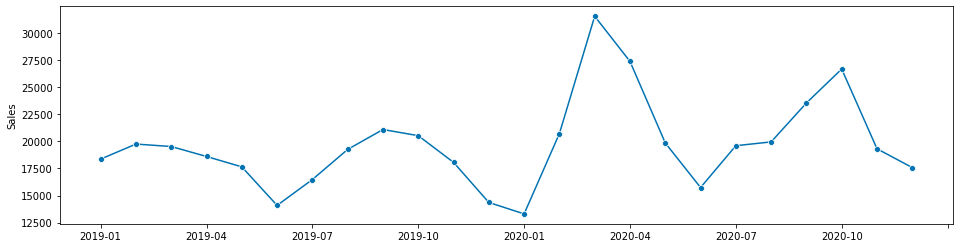

In [64]:
y = tl
plot_series(y);

18 6


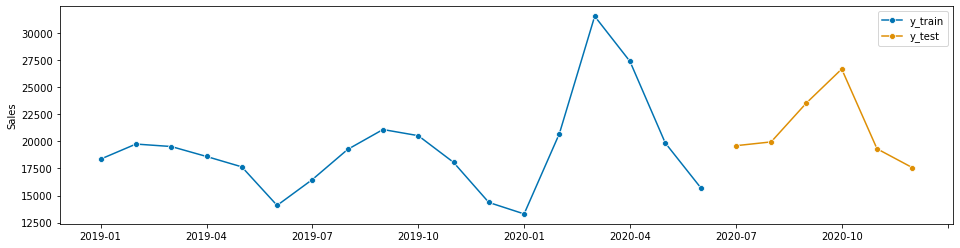

In [74]:
y_train, y_test = temporal_train_test_split(y, test_size=6)
plot_series(y_train, y_test, labels=["y_train", "y_test"])
print(y_train.shape[0], y_test.shape[0])

In [66]:
fh = ForecastingHorizon(y_test.index, is_relative=False)
fh

ForecastingHorizon(['2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12'], dtype='period[M]', name='period_of_year', freq='M', is_relative=False)

0.14147665584057306

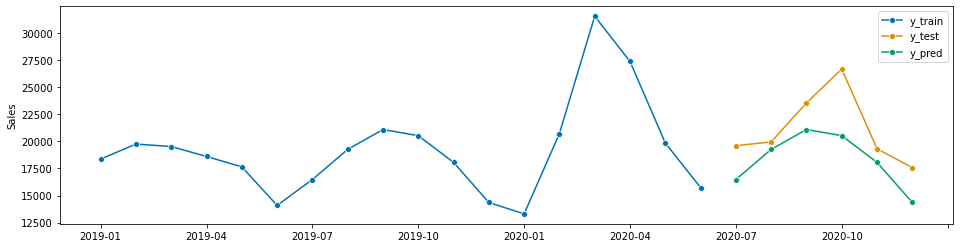

In [67]:
forecaster = NaiveForecaster(strategy="last", sp=12)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
mean_absolute_percentage_error(y_pred, y_test)

C:\Users\iov\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\iov\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\Users\iov\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\iov\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\iov\anaconda3\lib\site-packages\statsmodel

C:\Users\iov\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\iov\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\iov\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\Users\iov\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\iov\anaconda3\lib\site-packages\

0.11045151272281466

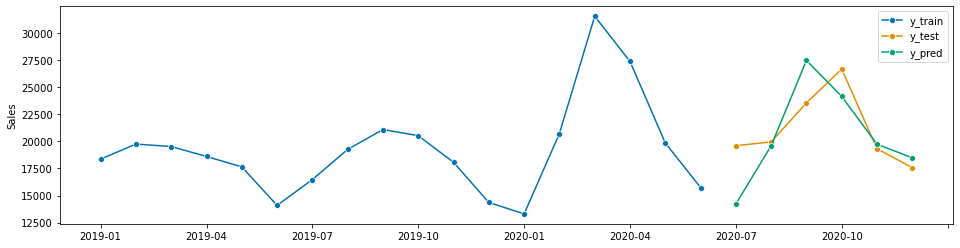

In [68]:
forecaster = AutoARIMA(sp=3)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
mean_absolute_percentage_error(y_pred, y_test)


In [69]:
fh1 = ForecastingHorizon(
    pd.PeriodIndex(pd.date_range("2021-01", periods=24, freq="M")), is_relative=False)

C:\Users\iov\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\iov\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\iov\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\iov\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\iov\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.

0.16616843062232925

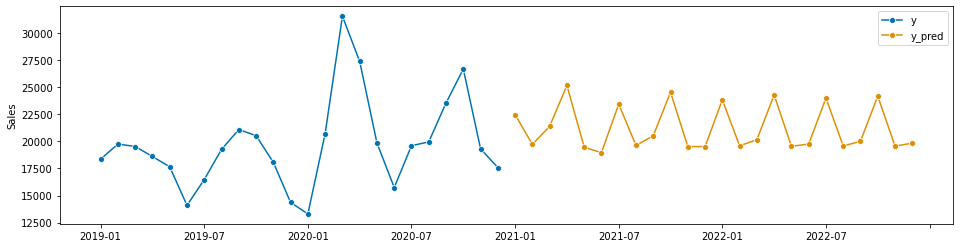

In [70]:
forecaster = AutoARIMA(sp=3)
forecaster.fit(y)

y_pred = forecaster.predict(fh1)
plot_series(y, y_pred, labels=["y", "y_pred"])
mean_absolute_percentage_error(y_pred, y)


0.19854415545347756

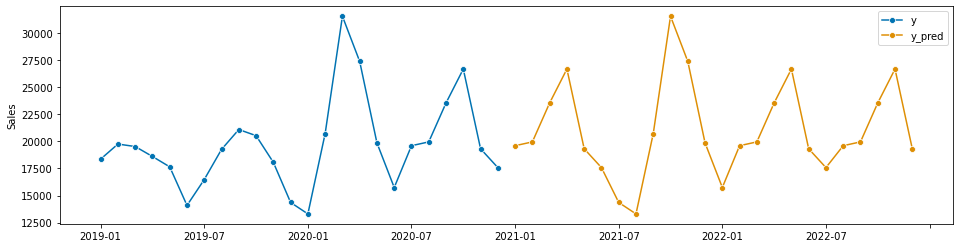

In [71]:
regressor = KNeighborsRegressor(n_neighbors=1)
forecaster = make_reduction(regressor, strategy="recursive")

forecaster.fit(y)
y_pred = forecaster.predict(fh1)
plot_series(y, y_pred, labels=["y", "y_pred"])
mean_absolute_percentage_error(y_pred, y)